In [19]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['figure.figsize'] = 10,6

from tensorflow.keras.models import load_model
import tensorflow.keras as K

In [2]:
# Load in the data
data_directory = "/scratch/manderson/numpy/pulses/lib/detector_final/"
X = np.load(data_directory + "test/X_lib_pulses_r20.npy")
Y = np.load(data_directory + "test/y_lib_pulses_r20.npy")

In [27]:
disc_n = load_model("saved_models/discriminator_n_2")

/home/nrowe/.local/lib/python3.8/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: networks.discriminator is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


In [28]:
disc_n.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 autoencoder_input (InputLay  [(None, 4096)]           0         
 er)                                                             
                                                                 
 expand_dims_for_conv1d (Lam  (None, 4096, 1)          0         
 bda)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 4096, 32)          64        
                                                                 
 activation_23 (Activation)  (None, 4096, 32)          0         
                                                                 
 conv1d_20 (Conv1D)          (None, 4088, 32)          9248      
                                                                 
 activation_24 (Activation)  (None, 4088, 32)          0   

In [3]:
gen_n2c = load_model("saved_models/generator_n2c_2")
gen_c2n = load_model("saved_models/generator_c2n_2")

/home/nrowe/.local/lib/python3.8/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: networks.generator is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


In [22]:
# # Load Mark's model
# import sys
# sys.path.append("../denoising_code/")
# from neuralnetwork.tensorflow.keras.regularizers import SmoothnessRegularizer

# model_path = "/home/nrowe/tconv_autoencoder_multisite5.h5"
# custom_objects = {"SmoothnessRegularizer": SmoothnessRegularizer, "K": K}
# mark_model = load_model(model_path, custom_objects=custom_objects)

In [4]:
D = gen_n2c.predict(X)

219/219 [==============================] - 47s 206ms/step


In [5]:
N = gen_c2n.predict(Y)

219/219 [==============================] - 46s 207ms/step


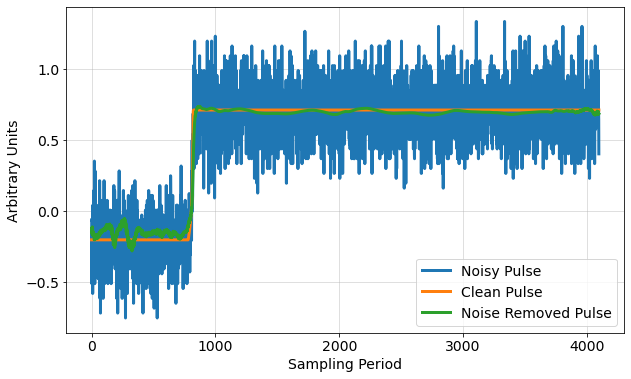

In [24]:
i = 1

plt.plot(X[i], label="Noisy Pulse")
plt.plot(Y[i], label="Clean Pulse")
plt.plot(D[i], label="Noise Removed Pulse")

plt.ylabel("Arbitrary Units")
plt.xlabel("Event Samples")
plt.legend()
plt.show()

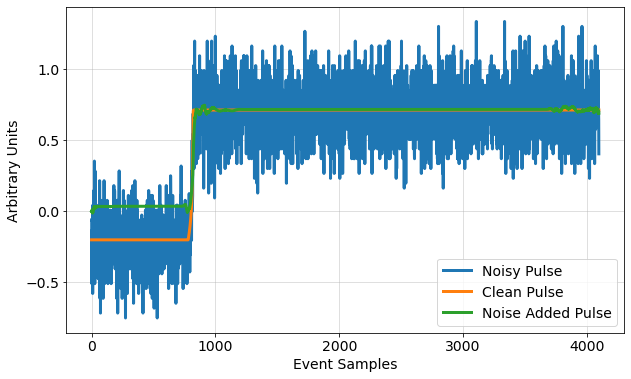

In [26]:
i = 1

plt.plot(X[i], label="Noisy Pulse")
plt.plot(Y[i], label="Clean Pulse")
plt.plot(N[i], label="Noise Added Pulse")

plt.ylabel("Arbitrary Units")
plt.xlabel("Event Samples")
plt.legend()
plt.show()